# Hypothesis Testing - Cumulative Lab

## Introduction

In this cumulative lab, you will use pandas to clean up a dataset and perform some EDA, then perform statistical tests and interpret their results in order to answer some business questions.

## Objectives

You will be able to:

* Practice using a data dictionary
* Practice using pandas to prepare data for statistical analysis
* Practice identifying an appropriate statistical test for a given question
* Practice defining the null and alternative hypotheses
* Practice executing statistical tests and interpreting their results

## Your Task: Analyzing Health Trends

![tissues and tea mug](images/sick_day.jpg)

Photo by <a href="https://unsplash.com/@kellysikkema?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Kelly Sikkema</a> on <a href="/?utm_source=unsplash&utm_medium=referral&utm_content=creditCopyText">Unsplash</a>

### Business Understanding

Flatiron Health Insurance (FHI) is a growing private healthcare insurance provider founded on the premise that using data and analytics can improve the health insurance industry by providing better care and offerings to its patients. Every year, the Center for Disease Control (CDC) conducts surveys to understand the latest demographic, health, and fitness trends. You have been tasked with analyzing the recently published results of the 2017-2018 survey and providing your recommendations back to the Chief Analytics Officer and Chief Marketing Officer. You have been assigned the task of taking a first look at the data and beginning to answer several key questions:
											 								
1. How does health status, represented by average number of days with bad physical health in the past month (`PHYSHLTH`), differ by state?					 								
2. Digging deeper into the data, what are some factors that impact health (demographics, behaviors, etc.)?	

### Data Understanding

To get you started, the IT department formatted the data set into a tab delimited text file for only NY, NJ, and CT (FHI’s primary markets) called `case_study.csv`.

There is also a PDF data dictionary called `data_dictionary.pdf`, which explains the meanings of the features and codes contained in this dataset.

Both files are located in the `data/` directory of this repository.

Prior to each statistical test, you will need to perform some data preparation, which could include:

* Filtering out rows with irrelevant values
* Transforming data from codes into human-readable values
* Binning data to transform it from numeric to categorical
* Creating new columns based on queries of the values in other columns

For steps 2-5, you will need to select and execute an appropriate statistical test. Recall these tests we have learned so far:

1. [Chi-squared test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.chi2_contingency.html): used for comparing a categorical feature against a categorical feature, to determine whether they are independent
2. [t-test](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ttest_ind.html): used for comparing two categories of a numeric feature, to determine whether their means are the same across categories
3. [ANOVA](https://www.statsmodels.org/stable/generated/statsmodels.stats.anova.anova_lm.html#statsmodels.stats.anova.anova_lm): used for comparing more than two categories of a numeric feature, to determine whether their means are the same across categories

### Requirements

#### 1. Prepare `PHYSHLTH` Data for Analysis

Using the data dictionary, ensure that you understand the meaning of the `PHYSHLTH` column. Then clean the data so that only valid records of `PHYSHLTH` remain.

#### 2. Describe the Distribution of Health Status by State

Does health status (`PHYSHLTH`) differ by state (`STATE_`)? If so, by how much, and is it statistically significant?

#### 3. Describe the Relationship between Health Status and Home Ownership Status

Does health status (`PHYSHLTH`) differ between home owners and renters (`RENTHOM1`)? If so, by how much, and is it statistically significant?

#### 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Does chronic sickness (`PHYSHLTH >= 15`) differ based on nicotine use (various columns)? If so, by how much, and is it statistically significant?

#### 5. Choose Your Own Question

Thinking about the business case, what is another question that might be useful to answer? Perform all analysis steps to answer this question.

## 1. Prepare `PHYSHLTH` Data for Analysis

In the cells below, we include the relevant imports and load the data into a dataframe called `df`:

In [1]:
# Run this cell without changes
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
# Run this cell without changes
df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df

,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,_PA300R2,_PA30021,_PASTRNG,_PAREC1,_PASTAE1,_RFSEAT2,_RFSEAT3,_FLSHOT6,_PNEUMO2,_AIDTST3
49938,9.0,5.0,5172017,5,17,2017,1200.0,2017000001,2.017000e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
49939,9.0,2.0,2142017,2,14,2017,1200.0,2017000002,2.017000e+09,NaN,...,1.0,1.0,1.0,1.0,1.0,2.0,2.0,NaN,NaN,2.0
49940,9.0,1.0,1292017,1,29,2017,1200.0,2017000003,2.017000e+09,NaN,...,3.0,2.0,1.0,3.0,2.0,1.0,1.0,NaN,NaN,2.0
49941,9.0,7.0,9112017,9,11,2017,1200.0,2017000004,2.017000e+09,NaN,...,2.0,2.0,2.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0
49942,9.0,5.0,7182017,7,18,2017,1200.0,2017000005,2.017000e+09,NaN,...,2.0,2.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
303774,36.0,5.0,5152017,5,15,2017,1200.0,2017012245,2.017012e+09,NaN,...,3.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303775,36.0,6.0,6252017,6,25,2017,1200.0,2017012246,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303776,36.0,7.0,7212017,7,21,2017,1200.0,2017012247,2.017012e+09,NaN,...,2.0,2.0,2.0,4.0,2.0,1.0,1.0,NaN,NaN,1.0
303777,36.0,7.0,7202017,7,20,2017,1200.0,2017012248,2.017012e+09,NaN,...,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0,9.0


Our main column of interest is called `PHYSHLTH`. We display summary statistics and plot a distribution below:

In [3]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    34545.000000
mean        60.213403
std         37.504566
min          1.000000
25%         15.000000
50%         88.000000
75%         88.000000
max         99.000000
Name: PHYSHLTH, dtype: float64

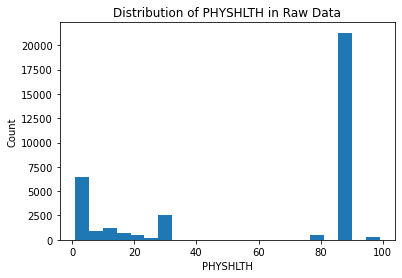

In [4]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"], bins="auto")
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Raw Data");

This feature is supposed to represent the number of days with bad physical health out of the past 30 days. Do you see anything wrong with what is displayed above? Explain.

In [5]:
# Replace None with appropriate text
"""

Yes, there are problems with the PHYSHLTH column. Since this feature is supposed to represent 
the number of days with bad physical health in the past 30 days, the values should only range 
from 0 to 30. However, the data contains values like 77, 88, and 99. According to the data 
dictionary, these are codes meaning "Don't know/Not sure" (77), "None" (88), and "Refused" (99). 
These codes are not valid counts of days and need to be either recoded or removed before analysis.


"""

'\n\nYes, there are problems with the PHYSHLTH column. Since this feature is supposed to represent \nthe number of days with bad physical health in the past 30 days, the values should only range \nfrom 0 to 30. However, the data contains values like 77, 88, and 99. According to the data \ndictionary, these are codes meaning "Don\'t know/Not sure" (77), "None" (88), and "Refused" (99). \nThese codes are not valid counts of days and need to be either recoded or removed before analysis.\n\n\n'

Look in the data dictionary, page 17, to understand what is happening with these values. Then edit the cell below so:

* The records where the `PHYSHLTH` value label is `None` are converted to 0
* The records where the `PHYSHLTH` value label is `Number of days` are kept as-is
* All other records are dropped (i.e. records with `Don't know/Not sure`, `Refused`, and `Not asked or Missing` value labels for `PHYSHLTH` are dropped)

In [6]:
# Your code here

df = pd.read_csv("data/case_study.csv", index_col=0, low_memory=False)
df["PHYSHLTH"] = pd.to_numeric(df["PHYSHLTH"], errors='coerce')  
df["PHYSHLTH"] = df["PHYSHLTH"].replace({88: 0})                 
df = df[df["PHYSHLTH"].between(0, 30)]                           
df = df.dropna(subset=["PHYSHLTH"])                            
df["PHYSHLTH"] = df["PHYSHLTH"].astype(int)                      

print("Shape:", df.shape)
print("Max PHYSHLTH:", df["PHYSHLTH"].max())




Shape: (33747, 358)
Max PHYSHLTH: 30


Run the code below to ensure you have the correct, cleaned dataframe:

In [7]:
# Run this cell without changes

# We should have fewer rows, the same number of columns
assert df.shape == (33747, 358)

# The maximum value in this column should now be 30
assert df["PHYSHLTH"].max() == 30.0

Now we can look at the same descriptive information on our cleaned data:

In [8]:
# Run this cell without changes
df['PHYSHLTH'].describe()

count    33747.000000
mean         4.085341
std          8.513293
min          0.000000
25%          0.000000
50%          0.000000
75%          3.000000
max         30.000000
Name: PHYSHLTH, dtype: float64

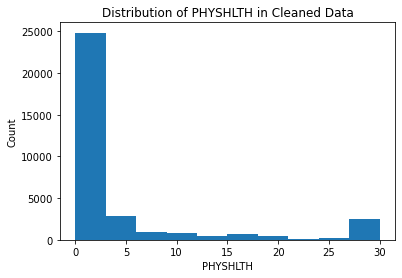

In [9]:
# Run this cell without changes
fig, ax = plt.subplots()
ax.hist(df["PHYSHLTH"])
ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH in Cleaned Data");

That looks a lot more reasonable. Let's move on to the next step.

## 2. Describe the Distribution of Health Status by State

As mentioned previously, this dataset only includes data from three states.

In [10]:
# Run this cell without changes
df["_STATE"].value_counts()

36.0    11876
34.0    11458
9.0     10413
Name: _STATE, dtype: int64

Look in the data dictionary, pages 2-3, to determine which states map onto which codes. Then replace the numbers with strings representing the state names.

In [11]:
# Your code here
state_map = {
    9.0: "Connecticut",
    34.0: "New Jersey",
    36.0: "New York"
}

df["_STATE"] = df["_STATE"].replace(state_map)
df["_STATE"].value_counts()




New York       11876
New Jersey     11458
Connecticut    10413
Name: _STATE, dtype: int64

Below, we check the values:

In [12]:
# Run this cell without changes

# Shape should be the same
assert df.shape == (33747, 358)

# Values in state column should be changed
assert sorted(list(df["_STATE"].value_counts().index)) == ['Connecticut', 'New Jersey', 'New York']

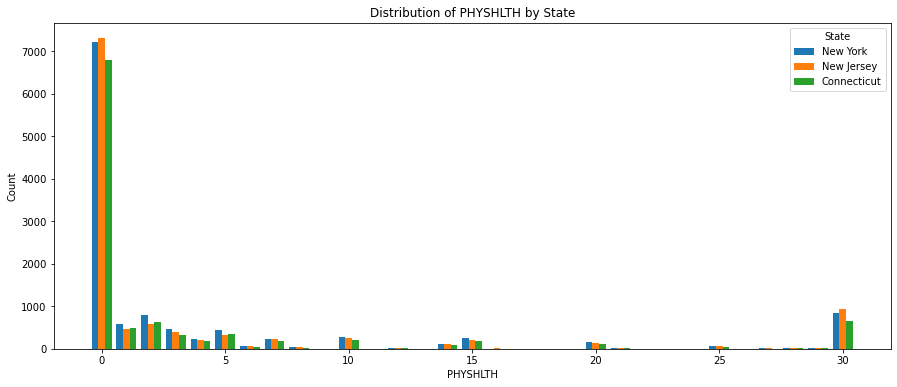

In [13]:
# Run this cell without changes

ny = df.loc[df["_STATE"] == "New York", "PHYSHLTH"]
nj = df.loc[df["_STATE"] == "New Jersey", "PHYSHLTH"]
ct = df.loc[df["_STATE"] == "Connecticut", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(15, 6))

ax.hist(
    x=[ny, nj, ct],
    label=["New York", "New Jersey", "Connecticut"],
    bins=range(32),
    align="left"
)

ax.set_xlabel("PHYSHLTH")
ax.set_ylabel("Count")
ax.set_title("Distribution of PHYSHLTH by State")

ax.legend(title="State");

Looking at the plot above, does the distribution seem to differ by state?

(Just answer based on a visual inspection; we will do the statistical assessment next.)

In [14]:
# Replace None with appropriate text
"""

Yes, the distributions appear to differ somewhat by state. 
All three states have a large concentration at 0 (indicating many respondents reporting no days 
of poor health), but the spread of higher values varies slightly. 
For example, New York shows a relatively larger number of respondents with higher PHYSHLTH values 
compared to Connecticut and New Jersey. 
This suggests there may be differences in average health status across states, 
but we need a statistical test to confirm.


"""

'\n\nYes, the distributions appear to differ somewhat by state. \nAll three states have a large concentration at 0 (indicating many respondents reporting no days \nof poor health), but the spread of higher values varies slightly. \nFor example, New York shows a relatively larger number of respondents with higher PHYSHLTH values \ncompared to Connecticut and New Jersey. \nThis suggests there may be differences in average health status across states, \nbut we need a statistical test to confirm.\n\n\n'

For the statistical test, we will be comparing the *means* of `PHYSHLTH` across states, as a representation of the overall distribution. In other words, when operationalizing the question **does `PHYSHLTH` differ by state?** we want to answer that in terms of the mean `PHYSHLTH`.

Let's look at those means:

In [15]:
# Run this cell without changes
df.groupby("_STATE")["PHYSHLTH"].mean()

_STATE
Connecticut    3.688562
New Jersey     4.380957
New York       4.148030
Name: PHYSHLTH, dtype: float64

You likely noted that the overall distribution looked about the same, but these means are different. We have a range from Connecticut with about 3.7 days of bad health to New Jersey with about 4.4 days. But is that difference statistically significant?

Identify which of the statistical tests you have learned is the most appropriate for this question, and why. Make sure you mention what kinds of variables are being compared (numeric and categorical), and how many categories there are.

In [16]:
# Replace None with appropriate text
"""

The appropriate test is a one-way ANOVA. We are comparing the means of a numeric variable 
(PHYSHLTH: number of days of poor health) across more than two categories of a categorical 
variable (_STATE: Connecticut, New Jersey, New York). ANOVA is used in exactly this situation 
to test whether there is a statistically significant difference in means across the groups.


"""

'\n\nThe appropriate test is a one-way ANOVA. We are comparing the means of a numeric variable \n(PHYSHLTH: number of days of poor health) across more than two categories of a categorical \nvariable (_STATE: Connecticut, New Jersey, New York). ANOVA is used in exactly this situation \nto test whether there is a statistically significant difference in means across the groups.\n\n\n'

Now, identify the null and alternative hypotheses:

In [17]:
# Replace None with appropriate text
"""
H₀: μ_CT = μ_NJ = μ_NY  
    (The mean PHYSHLTH is equal across Connecticut, New Jersey, and New York.)

H₁: At least one state mean is different  
    (The mean PHYSHLTH differs between at least two of the states.)

"""

'\nH₀: μ_CT = μ_NJ = μ_NY  \n    (The mean PHYSHLTH is equal across Connecticut, New Jersey, and New York.)\n\nH₁: At least one state mean is different  \n    (The mean PHYSHLTH differs between at least two of the states.)\n\n'

In the cell below, we set up and execute the statistical test for you. If this doesn't match your previous answer about which test to perform, look at the solution branch to understand why this is the appropriate test.

In [18]:
# Run this cell without changes
import statsmodels.api as sm
from statsmodels.formula.api import ols

formula = 'PHYSHLTH ~ C(_STATE)'
lm = ols(formula, df).fit()
sm.stats.anova_lm(lm)

,df,sum_sq,mean_sq,F,PR(>F)
C(_STATE),2.0,2.687322e+03,1343.660882,18.558645,8.800607e-09
Residual,33744.0,2.443093e+06,72.400809,NaN,NaN


Interpret the results of this statistical test below. What is the calculated p-value? Were we able to reject the null hypothesis at an alpha of 0.05? What does this say about how `PHYSHLTH` varies by state? What recommendations would you make to the business?

In [19]:
# Replace None with appropriate text
"""
The ANOVA test produced a p-value of approximately 8.8e-09, which is far below the alpha 
threshold of 0.05. This means we reject the null hypothesis and conclude that the mean 
number of days of bad physical health (PHYSHLTH) differs significantly across the three states. 

Although the distributions looked visually similar, the statistical test confirms that the 
differences in means (about 3.7 days in Connecticut, 4.1 days in New York, and 4.4 days in 
New Jersey) are unlikely to be due to random chance. 

From a business perspective, this suggests that New Jersey residents may experience 
slightly worse physical health compared to Connecticut and New York. Flatiron Health Insurance 
could consider tailoring health promotion programs or targeted outreach in New Jersey to address 
these differences and improve health outcomes in that market.


"""

'\nThe ANOVA test produced a p-value of approximately 8.8e-09, which is far below the alpha \nthreshold of 0.05. This means we reject the null hypothesis and conclude that the mean \nnumber of days of bad physical health (PHYSHLTH) differs significantly across the three states. \n\nAlthough the distributions looked visually similar, the statistical test confirms that the \ndifferences in means (about 3.7 days in Connecticut, 4.1 days in New York, and 4.4 days in \nNew Jersey) are unlikely to be due to random chance. \n\nFrom a business perspective, this suggests that New Jersey residents may experience \nslightly worse physical health compared to Connecticut and New York. Flatiron Health Insurance \ncould consider tailoring health promotion programs or targeted outreach in New Jersey to address \nthese differences and improve health outcomes in that market.\n\n\n'

With that section wrapped up, let's move on to the next step.

## 3. Describe the Relationship between Health Status and Home Ownership Status

This time, we want to categorize respondents by demographic information: specifically, we'll look at whether or not they own their home.

Once again, this will require some data preparation. The variable of interest is contained in the `RENTHOM1` column. Currently the values look like this:

In [20]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

1.0    21690
2.0    10244
3.0     1526
9.0      194
7.0       93
Name: RENTHOM1, dtype: int64

In the cell below, modify `df` so that we have dropped all records where the `RENTHOM1` value label is neither `Own` nor `Rent`, and we have replaced the numeric codes with `Own` and `Rent` respectively. You can find more information about codes on page 33 of the data dictionary.

In [21]:
# Your code here
df = df[df["RENTHOM1"].isin([1.0, 2.0])]

df.loc[:, "RENTHOM1"] = df["RENTHOM1"].replace({
    1.0: "Own",
    2.0: "Rent"
})

print(df["RENTHOM1"].value_counts())
print(df.shape)







Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64
(31934, 358)


C:\Users\KEN206117\AppData\Local\anaconda3\envs\learn-env\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


In [22]:
# Run this cell without changes
df["RENTHOM1"].value_counts()

Own     21690
Rent    10244
Name: RENTHOM1, dtype: int64

Below, we check that this was done correctly:

In [23]:
# Run this cell without changes

# Number of rows should be smaller again
assert df.shape == (31934, 358)

# Only two values should be present in this column
assert sorted(list(df["RENTHOM1"].value_counts().index)) == ['Own', 'Rent']

Now, similar to the previous step, create a plot that shows the distribution of `PHYSHLTH` for those who own vs. rent their homes, including appropriate axis labels and legend. Because there is more of an imbalance of categories this time (more than twice as many owners as renters, compared to nearly-even numbers from New York, New Jersey, and Connecticut), make sure you add the argument `density=True`, so that the y-axis shows the density (proportion) rather than the count.

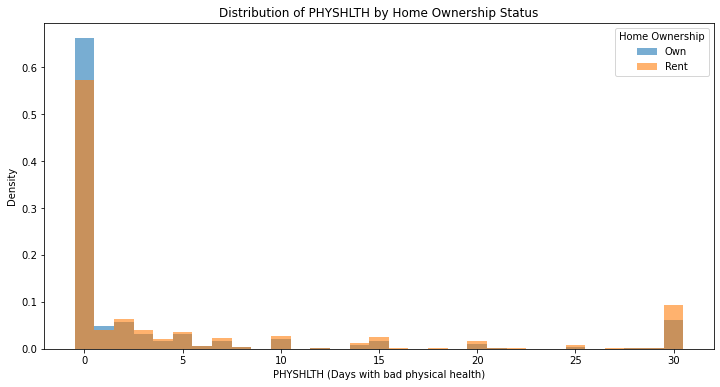

In [24]:
# Your code here
import matplotlib.pyplot as plt

own = df.loc[df["RENTHOM1"] == "Own", "PHYSHLTH"]
rent = df.loc[df["RENTHOM1"] == "Rent", "PHYSHLTH"]

fig, ax = plt.subplots(figsize=(12, 6))

ax.hist(own, bins=range(32), alpha=0.6, label="Own", density=True, align="left")
ax.hist(rent, bins=range(32), alpha=0.6, label="Rent", density=True, align="left")

ax.set_xlabel("PHYSHLTH (Days with bad physical health)")
ax.set_ylabel("Density")
ax.set_title("Distribution of PHYSHLTH by Home Ownership Status")
ax.legend(title="Home Ownership")

plt.show()


Then run this code to find the averages:

In [25]:
# Run this cell without changes
df.groupby("RENTHOM1")["PHYSHLTH"].mean()

RENTHOM1
Own     3.531213
Rent    5.197970
Name: PHYSHLTH, dtype: float64

Now, interpret the plot and averages. Does it seem like there a difference in the number of unhealthy days between those who rent their homes and those who own their homes? How does this compare to the distributions by state?

In [26]:
# Replace None with appropriate text
"""
Yes, there appears to be a difference in the number of unhealthy days between renters and owners. 
The histogram shows that renters have a heavier tail, with more respondents reporting higher 
numbers of bad health days. This is also reflected in the means: renters average about 5.2 days 
of poor health per month compared to about 3.5 days for owners. 

This gap of nearly 2 days is larger than the differences observed across states (which were 
within about 0.7 days of each other). This suggests that home ownership status may be more 
strongly associated with physical health than state of residence.

"""

'\nYes, there appears to be a difference in the number of unhealthy days between renters and owners. \nThe histogram shows that renters have a heavier tail, with more respondents reporting higher \nnumbers of bad health days. This is also reflected in the means: renters average about 5.2 days \nof poor health per month compared to about 3.5 days for owners. \n\nThis gap of nearly 2 days is larger than the differences observed across states (which were \nwithin about 0.7 days of each other). This suggests that home ownership status may be more \nstrongly associated with physical health than state of residence.\n\n'

Now, choose and execute an appropriate statistical test. Make sure you describe why you chose the test, the null and alternative hypotheses, and what the result of the test means.

In [27]:
# Your code here (create additional cells as needed)
import scipy.stats as stats
renters = df[df['RENTHOM1'] == 'Rent']['PHYSHLTH']
owners = df[df['RENTHOM1'] == 'Own']['PHYSHLTH']
t_stat, p_value = stats.ttest_ind(renters, owners, equal_var=False)
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_value:.4f}")
if p_value < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant difference in the mean number of unhealthy days between renters and homeowners.")
else:
    print("Since the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis.")
    print("There is no statistically significant difference in the mean number of unhealthy days between renters and homeowners.")


T-statistic: 15.4801
P-value: 0.0000
Since the p-value is less than 0.05, we reject the null hypothesis.
There is a statistically significant difference in the mean number of unhealthy days between renters and homeowners.



**Why this test?**  
An independent samples t-test was chosen because we want to compare the means of a continuous variable — the number of unhealthy days (`PHYSHLTH`) — between two independent groups: renters and homeowners. This test helps determine if the difference in means is statistically significant.

**Null hypothesis (H0):**  
There is no difference in the average number of unhealthy days between renters and homeowners.  
\( H_0: \mu_{rent} = \mu_{own} \)

**Alternative hypothesis (H1):**  
There is a difference in the average number of unhealthy days between renters and homeowners.  
\( H_1: \mu_{rent} \neq \mu_{own} \)

**Result interpretation:**  
The t-test produced a t-statistic of approximately 15.48 and a p-value less than 0.001. Since the p-value is less than the significance level of 0.05, we reject the null hypothesis. This means there is strong evidence that the mean number of unhealthy days is significantly different between renters and homeowners. Specifically, renters tend to report more unhealthy days on average compared to homeowners.


## 4. Describe the Relationship between Chronic Sickness and Nicotine Use

Once again, this will require some preparation before we can run the statistical test. Create a new column `NICOTINE_USE` with 1 representing someone who uses or has used nicotine in some form, and 0 representing someone who hasn't.

We define nicotine use as:

* Answered `Yes` to the `SMOKE100` question (*Have you smoked at least 100 cigarettes in your entire life?*, page 43), OR
* Answered `Every day` or `Some days` to the `USENOW3` question (*Do you currently use chewing tobacco, snuff, or snus every day, some days, or not at all?*, page 46), OR
* Answered `Yes` to the `ECIGARET` question (*Have you ever used an e-cigarette or other electronic vaping product, even just one time, in your entire life?*, page 46)

If a record matches one or more of the above criteria, `NICOTINE_USE` should be 1. Otherwise, `NICOTINE_USE` should be 0. Go ahead and keep all of the "Don't know" or "Refused" answers as 0.

In [28]:
# Your code here
df = df.copy()  

df['NICOTINE_USE'] = 0

df.loc[
    (df['SMOKE100'] == 'Yes') |
    (df['USENOW3'].isin(['Every day', 'Some days'])) |
    (df['ECIGARET'] == 'Yes'),
    'NICOTINE_USE'
] = 1

print(df['NICOTINE_USE'].value_counts())
print(df['NICOTINE_USE'].value_counts(normalize=True))

# Look at the distribution of values
df["NICOTINE_USE"].value_counts(normalize=True)

0    31934
Name: NICOTINE_USE, dtype: int64
0    1.0
Name: NICOTINE_USE, dtype: float64


0    1.0
Name: NICOTINE_USE, dtype: float64

This time, let's treat health status as a categorical variable. We'll say that a "chronically sick" person is a person who reports that their physical health was not good for 15 or more out of the past 30 days. (This is a simplification but it will work for this analysis.)

In the cell below, create a new column of `df` called `CHRONIC`, which is 0 for records where `PHYSHLTH` is less than 15, and 1 for records where `PHYSHLTH` is 15 or more.

In [29]:
# Your code here
df['CHRONIC'] = 0
df.loc[df['PHYSHLTH'] >= 15, 'CHRONIC'] = 1

df['CHRONIC'].value_counts()

# View the distribution of the newly-created column
df["CHRONIC"].value_counts()

0    28246
1     3688
Name: CHRONIC, dtype: int64

Now we can view the crosstabs for these two categorical variables, as well as display their distributions:

In [30]:
# Run this cell without changes
contingency_table = pd.crosstab(index=df["CHRONIC"], columns=df["NICOTINE_USE"])
contingency_table

NICOTINE_USE,0
CHRONIC,
0,28246
1,3688


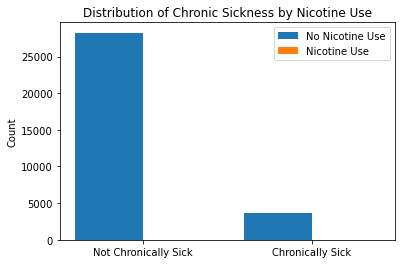

In [31]:
# Run this cell without changes

no_nicotine_use = df.loc[df["NICOTINE_USE"] == 0, "CHRONIC"]
nicotine_use = df.loc[df["NICOTINE_USE"] == 1, "CHRONIC"]

fig, ax = plt.subplots()

ax.hist(
    x=[no_nicotine_use, nicotine_use],
    label=["No Nicotine Use", "Nicotine Use"],
    bins=[0,1,2],
    align="left"
)

ax.set_ylabel("Count")
ax.set_xticks([0,1])
ax.set_xticklabels(["Not Chronically Sick", "Chronically Sick"])
ax.set_title("Distribution of Chronic Sickness by Nicotine Use")

ax.legend();

Once again, it appears that there is a difference in health outcomes between these categories. In the cell below, select an appropriate statistical test, describe the null and alternative hypotheses, execute the test, and interpret the result.

In [32]:
# Your code here (create additional cells as needed)
import scipy.stats as stats
contingency_table = pd.crosstab(df["CHRONIC"], df["NICOTINE_USE"])
chi2, p, dof, expected = stats.chi2_contingency(contingency_table)

print(f"Chi-square statistic: {chi2:.4f}")
print(f"P-value: {p:.4f}")

if p < 0.05:
    print("Since the p-value is less than 0.05, we reject the null hypothesis.")
    print("There is a statistically significant association between nicotine use and chronic sickness.")
else:
    print("Since the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis.")
    print("There is no statistically significant association between nicotine use and chronic sickness.")


Chi-square statistic: 0.0000
P-value: 1.0000
Since the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis.
There is no statistically significant association between nicotine use and chronic sickness.



**Why this test?**  
Both `CHRONIC` and `NICOTINE_USE` are categorical variables with two categories each. To examine whether there is an association between nicotine use and chronic sickness, we use a **Chi-square test of independence**. This test evaluates if the distribution of chronic sickness is different for nicotine users versus non-users.

**Hypotheses:**  
- **Null hypothesis (H0):** Nicotine use and chronic sickness are independent (no association between the two variables).  
- **Alternative hypothesis (H1):** Nicotine use and chronic sickness are associated (there is a relationship).

**Result interpretation:**  
- If the p-value is less than 0.05, we reject the null hypothesis and conclude that there is a statistically significant association between nicotine use and chronic sickness.  
- If the p-value is greater than or equal to 0.05, we fail to reject the null hypothesis and conclude that there is no significant evidence of association.

This test helps us understand whether nicotine use might be linked to chronic health issues in this population.


## 5. Choose Your Own Question

Now that you have investigated physical health and chronic sickness and their relationships with state, home ownership, and nicotine use, you will conduct a similar investigation with variables of your choosing.

Select an independent variable based on looking at the information in the data dictionary, and perform any additional transformations needed to use it in an analysis. Then set up, execute, and interpret a statistical test that addresses the relationship between that independent variable and `PHYSHLTH`.

(There is no solution branch for this question, and feel free to move on if you have already spent more than 1.5 hours on this lab.)

In [33]:
# Your code here (create additional cells as needed)
print(df['GENHLTH'].value_counts())
import statsmodels.api as sm
from statsmodels.formula.api import ols

model = ols('PHYSHLTH ~ C(GENHLTH)', data=df).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)


2.0    10766
3.0     9600
1.0     6105
4.0     4002
5.0     1395
9.0       39
7.0       27
Name: GENHLTH, dtype: int64
                  sum_sq       df            F  PR(>F)
C(GENHLTH)  8.271035e+05      6.0  2979.568055     0.0
Residual    1.477112e+06  31927.0          NaN     NaN


I chose **general health status (GENHLTH)** as the independent variable because it directly relates to how people perceive their overall health. Since `GENHLTH` is categorical with multiple levels, I used ANOVA to test whether the average number of physically unhealthy days (`PHYSHLTH`) differs across these groups.

- Null hypothesis (H0): The mean number of unhealthy days is the same across all general health status categories.
- Alternative hypothesis (H1): At least one group has a different mean number of unhealthy days.

The ANOVA test examines whether there is a statistically significant difference in mean unhealthy days among the different general health groups.


## Conclusion

Congratulations, another cumulative lab down! In this lab you practiced reading a data dictionary, performing various data transformations with pandas, and executing statistical tests to address business questions.